# 1.Logistic_regression


# 1.1) Problem Statment

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3      150             66             23       94  28.1   
4      150             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   52        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.shape

(768, 8)

# 1.2) Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df.describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   121.117188      69.076823      20.536458   79.799479   31.992578   
std     31.805091      19.367794      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    142.000000      80.000000      32.000000  127.250000   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.243490    0.348958  
std                    0.331329   11.758182    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

<AxesSubplot:xlabel='Outcome', ylabel='count'>

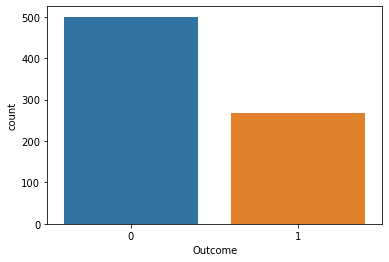

In [6]:
sns.countplot(x =df['Outcome'])

# 1.3) Train Test Split

In [7]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=11,stratify=y)

# 1.4) Model Training

In [8]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

# 1.5) Evaluation

In [9]:
# Tsting_data_evaluation
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[110  15]
 [ 28  39]]
****************************************************************************************
Accuracy : 0.7760416666666666
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.72      0.58      0.64        67

    accuracy                           0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



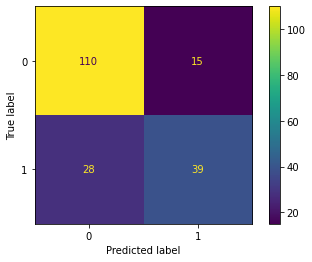

In [10]:
plot_confusion_matrix(logistic_model,x_test, y_test)

In [11]:
# Training_data_evaluation
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[333  42]
 [ 86 115]]
****************************************************************************************
Accuracy : 0.7777777777777778
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       375
           1       0.73      0.57      0.64       201

    accuracy                           0.78       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



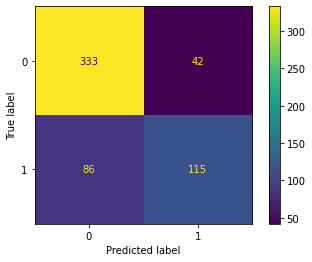

In [12]:
plot_confusion_matrix(logistic_model,x_train, y_train)

# 1.6 Comparision

# 2.KNN Classifier

In [13]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [14]:
df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3      150             66             23       94  28.1   
4      150             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   52        1  
3                     0.167   21        0  
4                     2.288   33        1

# 2.1) EDA

<AxesSubplot:>

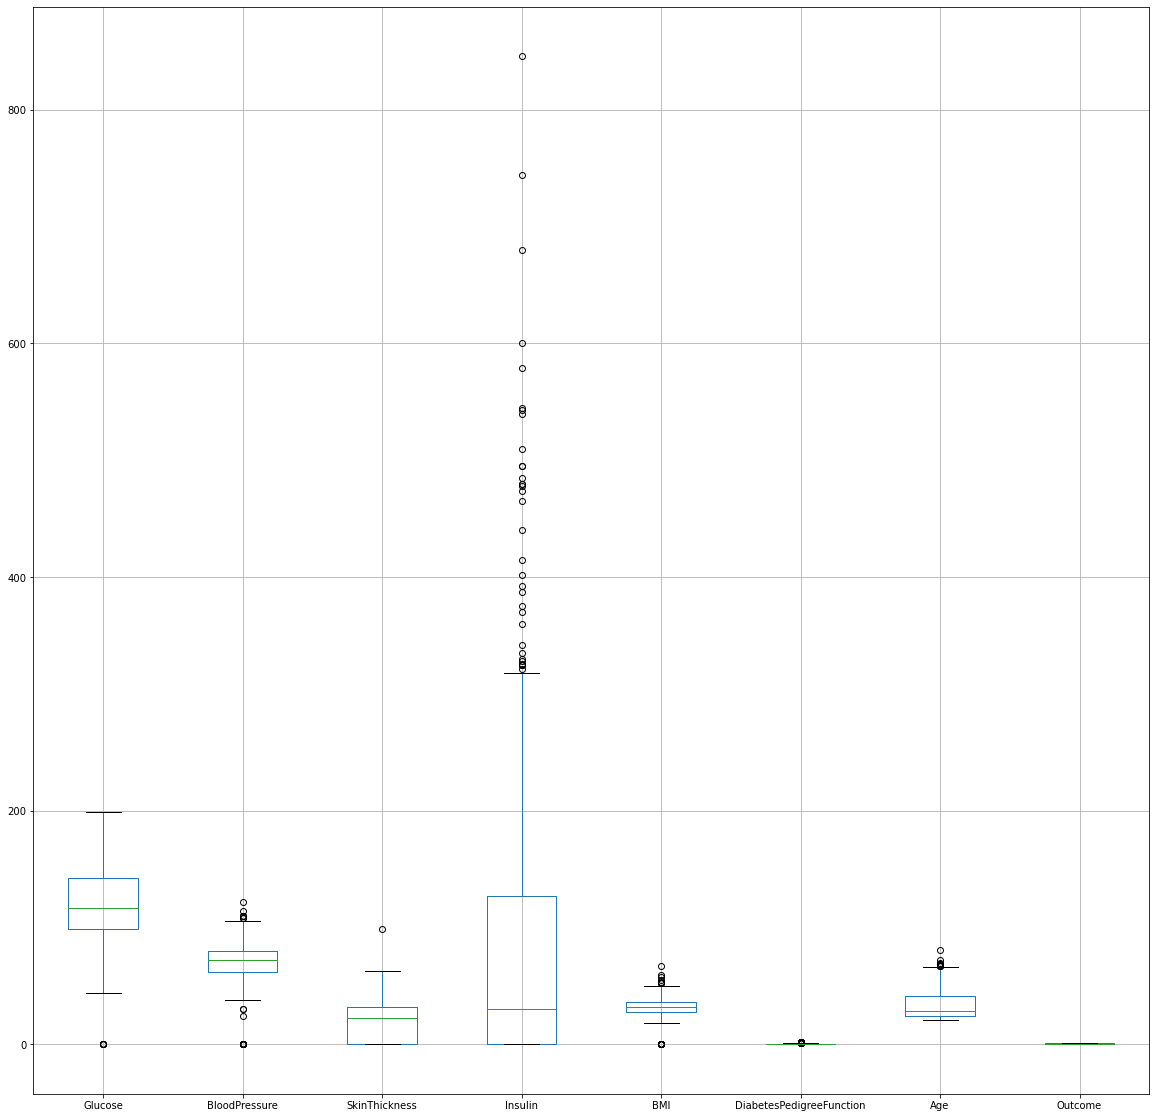

In [15]:
plt.figure(figsize=(20,20))
df.boxplot()

In [16]:
df['Glucose']

0      148
1       85
2      183
3      150
4      150
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

<AxesSubplot:xlabel='Glucose'>

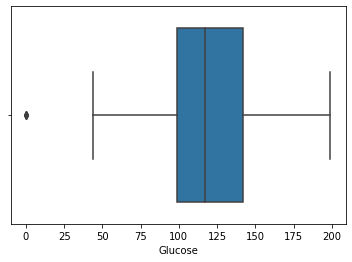

In [17]:
sns.boxplot(x=df['Glucose'])

In [18]:
q1 = df['Glucose'].quantile(0.25)
q2 = df['Glucose'].quantile(0.50)
q3 = df['Glucose'].quantile(0.75)
median =  df['Glucose'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 99.0
Q2 : 117.0
Q3 : 142.0
median : 117.0
Upper Tail : 206.5
Lower Tail : 34.5


In [19]:
df[['Glucose']].loc[df['Glucose'] > upper_tail]

Empty DataFrame
Columns: [Glucose]
Index: []

In [20]:
df[['Glucose']].loc[df['Glucose'] < lower_tail]

Glucose
75         0
182        0
342        0
349        0
502        0

In [21]:
df.loc[df['Glucose'] < lower_tail,'Glucose'] = median

df.loc[df['Glucose'] < lower_tail,'Glucose']

Series([], Name: Glucose, dtype: int64)

<AxesSubplot:xlabel='Glucose'>

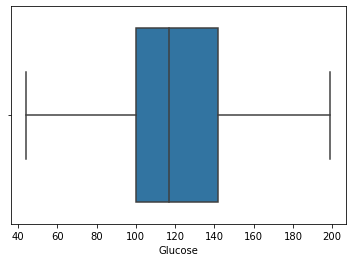

In [22]:
sns.boxplot(x=df['Glucose'])

<AxesSubplot:xlabel='BloodPressure'>

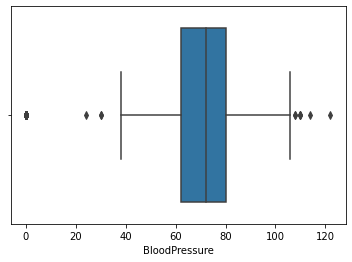

In [23]:
sns.boxplot(x=df['BloodPressure'])

In [24]:
q1 = df['BloodPressure'].quantile(0.25)
q2 = df['BloodPressure'].quantile(0.50)
q3 = df['BloodPressure'].quantile(0.75)
median =  df['BloodPressure'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 62.0
Q2 : 72.0
Q3 : 80.0
median : 72.0
Upper Tail : 107.0
Lower Tail : 35.0


In [25]:
df[['BloodPressure']].loc[df['BloodPressure'] > upper_tail]

BloodPressure
43             110
84             108
106            122
177            110
362            108
549            110
691            114

In [26]:
df[['BloodPressure']].loc[df['BloodPressure'] < lower_tail]

BloodPressure
7                0
15               0
18              30
49               0
60               0
78               0
81               0
125             30
172              0
193              0
222              0
261              0
266              0
269              0
300              0
332              0
336              0
347              0
357              0
426              0
430              0
435              0
453              0
468              0
484              0
494              0
522              0
533              0
535              0
589              0
597             24
601              0
604              0
619              0
643              0
697              0
703              0
706              0

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

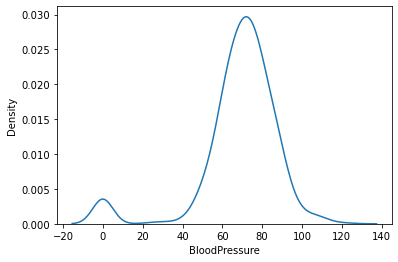

In [27]:
sns.kdeplot(df['BloodPressure'])

In [28]:
median_bp = df.loc[(df['BloodPressure'] <= upper_tail) &
                           (df['BloodPressure'] >= lower_tail),'BloodPressure'].median()

median_bp

72.0

In [29]:
df.loc[(df['BloodPressure'] > upper_tail)|
                           (df['BloodPressure'] < lower_tail),'BloodPressure'] = median_bp

In [30]:
df.loc[(df['BloodPressure'] > upper_tail)|
                           (df['BloodPressure'] < lower_tail),'BloodPressure']

Series([], Name: BloodPressure, dtype: int64)

In [31]:
sns.boxplot(x=df['BloodPressure'])

<AxesSubplot:xlabel='BloodPressure'>

In [32]:
sns.kdeplot(df['BloodPressure'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

<AxesSubplot:xlabel='SkinThickness'>

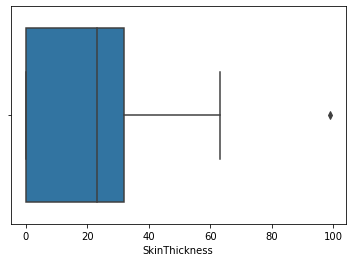

In [33]:
sns.boxplot(x=df['SkinThickness'])

In [34]:
q1 = df['SkinThickness'].quantile(0.25)
q2 = df['SkinThickness'].quantile(0.50)
q3 = df['SkinThickness'].quantile(0.75)
median =  df['SkinThickness'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 0.0
Q2 : 23.0
Q3 : 32.0
median : 23.0
Upper Tail : 80.0
Lower Tail : -48.0


In [35]:
df[['SkinThickness']].loc[df['SkinThickness'] > upper_tail]

SkinThickness
579             99

In [36]:
df.loc[df['SkinThickness'] > upper_tail,'SkinThickness'] = median

df.loc[df['SkinThickness'] > upper_tail,'SkinThickness']

Series([], Name: SkinThickness, dtype: int64)

In [37]:
sns.boxplot(x=df['SkinThickness'])

<AxesSubplot:xlabel='SkinThickness'>

<AxesSubplot:xlabel='Insulin'>

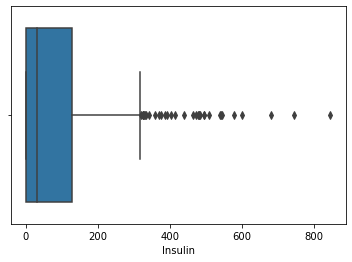

In [38]:
sns.boxplot(x=df['Insulin'])

In [39]:
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.50)
q3 = df['Insulin'].quantile(0.75)
median =  df['Insulin'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 0.0
Q2 : 30.5
Q3 : 127.25
median : 30.5
Upper Tail : 318.125
Lower Tail : -190.875


In [40]:
df[['Insulin']].loc[df['Insulin'] > upper_tail]

Insulin
8        543
13       846
54       342
111      495
139      325
153      485
186      495
220      478
228      744
231      370
247      680
248      402
258      375
286      545
296      360
360      325
370      465
375      325
392      415
409      579
415      474
480      328
486      480
519      326
574      330
584      600
612      321
645      440
655      540
695      480
707      335
710      387
715      392
753      510

In [41]:
df.loc[df['Insulin'] > upper_tail,'Insulin'] = median

df.loc[df['Insulin'] > upper_tail,'Insulin']

Series([], Name: Insulin, dtype: float64)

<AxesSubplot:xlabel='Insulin'>

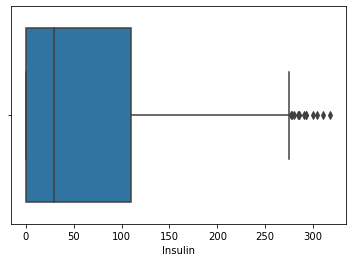

In [42]:
sns.boxplot(x=df['Insulin'])

In [43]:
sns.boxplot(x=df['BMI'])

<AxesSubplot:xlabel='BMI'>

In [44]:
q1 = df['BMI'].quantile(0.25)
q2 = df['BMI'].quantile(0.50)
q3 = df['BMI'].quantile(0.75)
median =  df['BMI'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 27.3
Q2 : 32.0
Q3 : 36.6
median : 32.0
Upper Tail : 50.550000000000004
Lower Tail : 13.35


In [45]:
df[['BMI']].loc[df['BMI'] > upper_tail]

BMI
120  53.2
125  55.0
177  67.1
193  52.3
247  52.3
303  52.9
445  59.4
673  57.3

In [46]:
median_bp = df.loc[(df['BMI'] <= upper_tail) &
                           (df['BMI'] >= lower_tail),'BMI'].median()

median_bp

32.0

In [47]:
df.loc[(df['BMI'] > upper_tail)|
                           (df['BMI'] < lower_tail),'BMI'] = median_bp

In [48]:
df.loc[(df['BMI'] > upper_tail)|
                           (df['BMI'] < lower_tail),'BMI']

Series([], Name: BMI, dtype: float64)

<AxesSubplot:xlabel='BMI'>

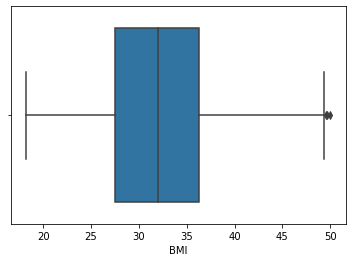

In [49]:
sns.boxplot(x=df['BMI'])

In [50]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

In [51]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q2 = df['DiabetesPedigreeFunction'].quantile(0.50)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
median =  df['DiabetesPedigreeFunction'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 0.24375
Q2 : 0.3725
Q3 : 0.62625
median : 0.3725
Upper Tail : 1.2
Lower Tail : -0.32999999999999996


In [52]:
df[['DiabetesPedigreeFunction']].loc[df['DiabetesPedigreeFunction'] > upper_tail]

DiabetesPedigreeFunction
4                       2.288
12                      1.441
39                      1.390
45                      1.893
58                      1.781
100                     1.222
147                     1.400
187                     1.321
218                     1.224
228                     2.329
243                     1.318
245                     1.213
259                     1.353
292                     1.224
308                     1.391
330                     1.476
370                     2.137
371                     1.731
383                     1.268
395                     1.600
445                     2.420
534                     1.251
593                     1.699
606                     1.258
618                     1.282
621                     1.698
622                     1.461
659                     1.292
661                     1.394

In [53]:
df.loc[df['DiabetesPedigreeFunction'] > upper_tail,'DiabetesPedigreeFunction'] = median

df.loc[df['DiabetesPedigreeFunction'] > upper_tail,'DiabetesPedigreeFunction']

Series([], Name: DiabetesPedigreeFunction, dtype: float64)

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

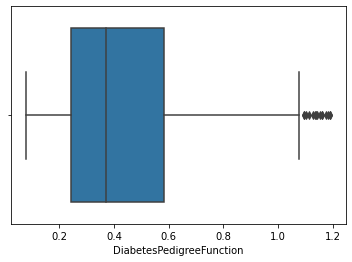

In [54]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

# 2.2) Train Test Split

In [55]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=11,stratify=y)

# 2.3) Model Training

In [56]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

# 2.4) Evaluation

In [57]:
# Testing Data Evaluation
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[104  21]
 [ 30  37]]
********************************************************************************
Accuracy is : 0.734375
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       125
           1       0.64      0.55      0.59        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.73      0.73      0.73       192



In [58]:
plot_confusion_matrix(knn_clf,x_test, y_test)

In [59]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[330  45]
 [ 60 141]]
********************************************************************************
Accuracy is : 0.8177083333333334
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       375
           1       0.76      0.70      0.73       201

    accuracy                           0.82       576
   macro avg       0.80      0.79      0.80       576
weighted avg       0.82      0.82      0.82       576



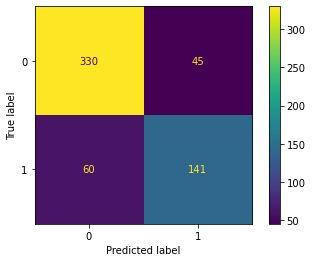

In [60]:
plot_confusion_matrix(knn_clf,x_train, y_train)

# 2.4) Feature Engineering

## Feature Engineering

In [61]:
x_df = df.drop('Outcome',axis = 1)
x_df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35      0.0  33.6   
1       85             66             29      0.0  26.6   
2      183             64              0      0.0  23.3   
3      150             66             23     94.0  28.1   
4      150             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                    0.6270   50  
1                    0.3510   31  
2                    0.6720   52  
3                    0.1670   21  
4                    0.3725   33

### Normalization

In [62]:
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(x_df)
x_normal_df = pd.DataFrame(array,columns=x_df.columns)

In [63]:
# Normalization
x = x_normal_df.copy()
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=24, stratify=y)

# 2.5) Hyperparameter Tuning

In [64]:
knn_clf = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(3,30),
                  'p' :[1,2]}

gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [65]:
# Testing Data Evaluation
knn_clf = gscv_knn_clf.best_estimator_

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[100  25]
 [ 32  35]]
********************************************************************************
Accuracy is : 0.703125
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       125
           1       0.58      0.52      0.55        67

    accuracy                           0.70       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.70      0.70      0.70       192



In [66]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[336  39]
 [ 70 131]]
********************************************************************************
Accuracy is : 0.8107638888888888
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       375
           1       0.77      0.65      0.71       201

    accuracy                           0.81       576
   macro avg       0.80      0.77      0.78       576
weighted avg       0.81      0.81      0.81       576



### Standardization

In [67]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(x_df)
x_std_df = pd.DataFrame(array,columns=x_df.columns)

In [68]:
x = x_std_df.copy()
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=24, stratify=y)

# Hyperparameter Tuning

In [69]:
knn_clf = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(3,30),
                  'p' :[1,2]}

gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=13, p=1)

In [70]:
# Testing Data Evaluation
knn_clf = gscv_knn_clf.best_estimator_

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[102  23]
 [ 28  39]]
********************************************************************************
Accuracy is : 0.734375
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       125
           1       0.63      0.58      0.60        67

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



In [71]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[333  42]
 [ 80 121]]
********************************************************************************
Accuracy is : 0.7881944444444444
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       375
           1       0.74      0.60      0.66       201

    accuracy                           0.79       576
   macro avg       0.77      0.74      0.76       576
weighted avg       0.78      0.79      0.78       576



# Comparision

# 3. Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [73]:
df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35      0.0  33.6   
1       85             66             29      0.0  26.6   
2      183             64              0      0.0  23.3   
3      150             66             23     94.0  28.1   
4      150             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                    0.6270   50        1  
1                    0.3510   31        0  
2                    0.6720   52        1  
3                    0.1670   21        0  
4                    0.3725   33        1

# 3.1) Train Test Split

In [74]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11, stratify=y)

# 3.1) Model Training

In [75]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

# 3.2) Model Evaluation

In [76]:
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print('*'*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print('*'*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[75 25]
 [21 33]]
********************************************************************************
Accuracy : 0.7012987012987013
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       100
           1       0.57      0.61      0.59        54

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154



In [77]:
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print('*'*80)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print('*'*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[400   0]
 [  0 214]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



# 3.3 Plot Decision Tree

In [78]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_Without_HYP.png')

# 3.4 Hyperparameter Tuning

In [79]:
dt_model = DecisionTreeClassifier()
hyperparameters ={ "criterion" :['gini','entropy'],
     'max_depth': np.arange(3,8),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}


gscv_dt_clf = GridSearchCV(dt_model,hyperparameters, cv = 5)
gscv_dt_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [80]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=13)

In [81]:
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[338  62]
 [ 58 156]]
********************************************************************************
Accuracy : 0.8045602605863192
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       400
           1       0.72      0.73      0.72       214

    accuracy                           0.80       614
   macro avg       0.78      0.79      0.79       614
weighted avg       0.81      0.80      0.80       614



In [82]:
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[85 15]
 [18 36]]
********************************************************************************
Accuracy : 0.7857142857142857
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.71      0.67      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



In [83]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_With_HYP.png')

method                                       Accuracy    precision     recall   f1-score   support

Without_hyperparamerter_tunning (testing)     0.69        0.77         0.76     0.76        100
Without_hyperparamerter_tunning (training)    0.10        0.10         0.10     0.10        400

With_hyperparamerter_tunning (testing)        0.78        0.83         0.85     0.84        100
With_hyperparamerter_tunning (training)       0.88        0.84         0.85     0.86        400


Conclusion - From Above conclusion model best with hyperparameter tuning

# 3. Random Forest Algorithm

In [84]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier


## 3.1 Train Test Split

In [85]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

## 3.2 Sampling

In [86]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11, stratify=y)

## 3.3 Model Training

In [87]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

## 3.4 Ealvation

In [88]:
## Training Data Evaluation 

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[400   0]
 [  0 400]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [89]:
## Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[82 18]
 [17 83]]
********************************************************************************
Accuracy : 0.825
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       100
           1       0.82      0.83      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



## 3.5 Hyperparameter Tuning

In [90]:
rf_model = RandomForestClassifier()

hyperparameters = {
                "n_estimators" :np.arange(10,200),
                "criterion" : ['gini','entropy'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(4,20), 
                "min_samples_leaf" : np.arange(3,10),
                "oob_score" : [True],
                "random_state" : [11]
                    }

gscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv = 7)
gscv_rf_model.fit(x_train, y_train)
gscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       min_samples_split=11, n_estimators=123, oob_score=True,
                       random_state=11)

In [91]:
rf_model = gscv_rf_model.best_estimator_

rf_model.fit(x_train, y_train )

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       min_samples_split=11, n_estimators=123, oob_score=True,
                       random_state=11)

In [92]:
## Training Data Evaluation 

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[313  87]
 [ 39 361]]
********************************************************************************
Accuracy : 0.8425
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       400
           1       0.81      0.90      0.85       400

    accuracy                           0.84       800
   macro avg       0.85      0.84      0.84       800
weighted avg       0.85      0.84      0.84       800



In [93]:
## Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[73 27]
 [14 86]]
********************************************************************************
Accuracy : 0.795
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       100
           1       0.76      0.86      0.81       100

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



### Final Conclusion

In [94]:
rf_model.n_features_in_

7

In [95]:
colunm = x.columns
colunm

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [96]:
Glucose  = 148
BloodPressure  = 50
SkinThickness  =  35
Insulin   = 0.0
BMI = 33.6
DiabetesPedigreeFunction = 0.6270
Age = 50

In [97]:

array = np.zeros(len(x.columns))

array[0] = Glucose
array[1] = BloodPressure
array[2] = SkinThickness
array[3] = Insulin
array[4] = BMI 
array[5] = DiabetesPedigreeFunction 
array[6] = Age
array

array([148.   ,  50.   ,  35.   ,   0.   ,  33.6  ,   0.627,  50.   ])

In [98]:

predicted_Diabetes = np.around(rf_model.predict([array])[0],2)
print("predicted_Diabetes is :",predicted_Diabetes)

predicted_Diabetes is : 1


In [99]:
import pickle

with open("rf_model_diabetes_data.pkl",'wb') as f:
    pickle.dump(rf_model,f)

In [100]:
import json
columns = {
    'data_column' : [columns.lower() for columns in x.columns]
}
with open("columns.json",'w') as f:
    json.dump(columns,f)